<a href="https://colab.research.google.com/github/HimanshuSahoo/Assignments_Codes/blob/main/Data_scraping_Himanshu_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd

In [ ]:
def get_page(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    return(soup)

In [ ]:
def get_links(soup):
    links = []
    linkslist = soup.find_all('a',{'class':'bookTitle'})
    base_url = "https://www.goodreads.com"
    for i in linkslist:
        book_link = i.get('href')
        complete_link = base_url + book_link
        links.append(complete_link)
    return(links)

In [ ]:
def extract_info(links):
    all_books = []
    for link in links:
        req = requests.get(link)
        book_soup = BeautifulSoup(req.text, 'html.parser')
        try:
            title = book_soup.find('h1',{'id':'bookTitle'}).text.strip()
            author = book_soup.find('span',{'itemprop':'name'}).text.strip()
            avg_rating = book_soup.find('span',{'itemprop':'ratingValue'}).text.strip()
            genre = book_soup.find('a',{'class':'actionLinkLite bookPageGenreLink'}).text.strip()
            description = book_soup.find('div',{'id':'description'}).text.strip()
        except AttributeError:
            continue
            
        book = {'Title':title,'Author':author,'Ratings':avg_rating,'Genre':genre,'Description':description}
        all_books.append(book)
        
    final_df = pd.DataFrame(all_books)
    
    return(final_df)

In [ ]:
books = []
for pg in range(1,21):
    url = ("https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page={}".format(pg))
    soup = get_page(url)
    links = get_links(soup)
    books.append(extract_info(links))
books = pd.concat(books,ignore_index=True)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
books

[]

In [ ]:
books.to_csv("Books_data_40.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
books_data = pd.read_csv("books_data_40.csv")


In [ ]:
books_data.head()

,Unnamed: 0,Unnamed: 0.1,title,author,average_rating,genre,description
0,0,0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,1,1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,2,2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,3,3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,4,4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...


In [ ]:
books_data = books.rename(columns={"title":"Title","author":"Author","average_rating":"Avg-Rating","genre":"Genre","description":"Description"})

In [ ]:
books_data

,Unnamed: 0,Title,Author,Avg-Rating,Genre,Description,Word_count
0,0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202
1,1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158
2,2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232
3,3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187
4,4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195
...,...,...,...,...,...,...,...
3347,3347,Asylum: A Hidden Tale - Sinister Tales,Anna Gallegos,4.18,Horror,Maria has been caught and sent to the home of ...,135
3348,3348,The Cruel Prince,Holly Black,4.09,Fantasy,This is a previously published cover edition o...,262
3349,3349,City of God,Augustine of Hippo,3.87,Philosophy,No book except the Bible itself had a greater ...,89
3350,3350,My Name is Joe,Stefan Bourque,3.65,Fiction,When Joe's doctor advises him to get his affai...,155


In [ ]:
books_data.shape

(3352, 7)

In [ ]:
books_data = books_data.drop(['Unnamed: 0'],axis=True)
books_data.head()

,Title,Author,Avg-Rating,Genre,Description,Word_count
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195


###  EDA - Data Exploration

In [ ]:
books_data.isnull().sum()

Title          0
Author         0
Avg-Rating     0
Genre          0
Description    0
Word_count     0
dtype: int64

In [ ]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        3352 non-null   object 
 1   Author       3352 non-null   object 
 2   Avg-Rating   3352 non-null   float64
 3   Genre        3352 non-null   object 
 4   Description  3352 non-null   object 
 5   Word_count   3352 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 157.2+ KB


In [ ]:
books_data.describe()

,Avg-Rating,Word_count
count,3352.000000,3352.000000
mean,4.035200,214.721062
std,0.261937,93.583470
min,2.050000,1.000000
25%,3.877500,161.000000
50%,4.050000,203.000000
75%,4.220000,256.000000
max,4.970000,1170.000000


In [ ]:
books_data.duplicated().sum()

16

In [ ]:
df = books_data.drop_duplicates()

df.shape

(3336, 6)

In [ ]:
df['Genre'].value_counts()

Fiction            802
Nonfiction         391
Fantasy            324
Classics           302
Young Adult        182
                  ... 
Food and Drink       1
Magical Realism      1
Occult               1
Apocalyptic          1
Comics               1
Name: Genre, Length: 77, dtype: int64

<AxesSubplot:>

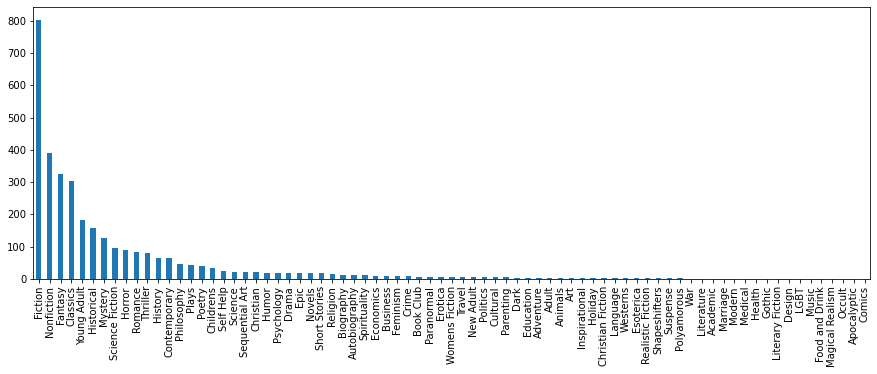

In [ ]:
df['Genre'].value_counts().plot(x='genre', y='count', kind='bar', figsize=(15,5))

In [ ]:
# Printing the book title and description randomly
print(df['Title'][50])
print(df['Description'][50])

The Adventures of Tom Sawyer
The Adventures of Tom Sawyer revolves around the youthful adventures of the novel's schoolboy protagonist, Thomas Sawyer, whose reputation precedes him for causing mischief and strife. Tom lives with his Aunt Polly, half-brother Sid, and cousin Mary in the quaint town of St. Petersburg, just off the shore of the Mississippi River. St. Petersburg is described as a typical s
The Adventures of Tom Sawyer revolves around the youthful adventures of the novel's schoolboy protagonist, Thomas Sawyer, whose reputation precedes him for causing mischief and strife. Tom lives with his Aunt Polly, half-brother Sid, and cousin Mary in the quaint town of St. Petersburg, just off the shore of the Mississippi River. St. Petersburg is described as a typical small-town atmosphere where the Christian faith is predominant, the social network is close-knit, and familiarity resides.  Unlike his brother Sid, Tom receives "lickings" from his Aunt Polly; ever the mischief-maker, wou

In [ ]:
# Printing the book title and description randomly
print(df['Title'][1200])
print(df['Description'][1200])

Gödel, Escher, Bach: An Eternal Golden Braid
Douglas Hofstadter's book is concerned directly with the nature of “maps” or links between formal systems. However, according to Hofstadter, the formal system that underlies all mental activity transcends the system that supports it. If life can grow out of the formal chemical substrate of the cell, if consciousness can emerge out of a formal system of firing neurons, then
Douglas Hofstadter's book is concerned directly with the nature of “maps” or links between formal systems. However, according to Hofstadter, the formal system that underlies all mental activity transcends the system that supports it. If life can grow out of the formal chemical substrate of the cell, if consciousness can emerge out of a formal system of firing neurons, then so too will computers attain human intelligence. Gödel, Escher, Bach is a wonderful exploration of fascinating ideas at the heart of cognitive science: meaning, reduction, recursion, and much more.
...mo

### Book description — Word count distribution

<ipython-input-121-33f124406d45>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

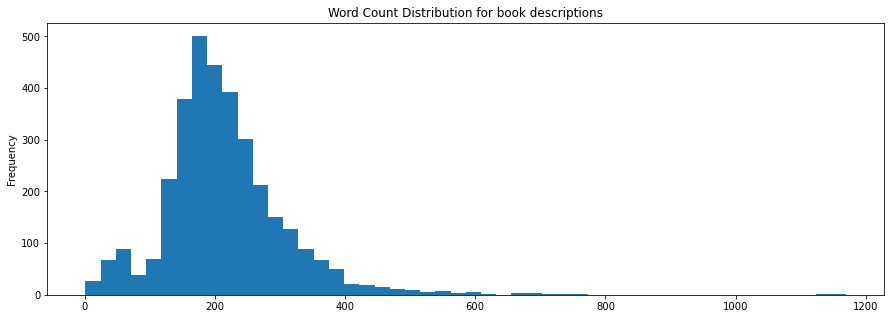

In [ ]:
# Calculating the word count for book description
df['word_count'] = df['Description'].apply(lambda x: len(str(x).split()))
# Plotting the word_count
df['word_count'].plot(
    kind = 'hist',
    bins = 50,
    figsize = (15,5), title = 'Word Count Distribution for book descriptions')

In [ ]:
We don’t have many lengthy book description. It is clear that goodreads.com provides short descriptions.

SyntaxError: invalid character in identifier (<ipython-input-122-e54d1864d808>, line 1)

### The distribution of top part-of-speech tags in the book descriptions

In [ ]:
from textblob import TextBlob
blob = TextBlob(str(df['Description']))
pos_df = pd.DataFrame(blob.tags, columns=['word','pos'])
pos_df

,word,pos
0,0,CD
1,The,DT
2,unforgettable,JJ
3,novel,NN
4,of,IN
...,...,...
95,Description,NN
96,Length,NNP
97,3336,CD
98,dtype,NN


<AxesSubplot:title={'center':'Top 20 Part-of-Speech tagging for the book descriptions'}>

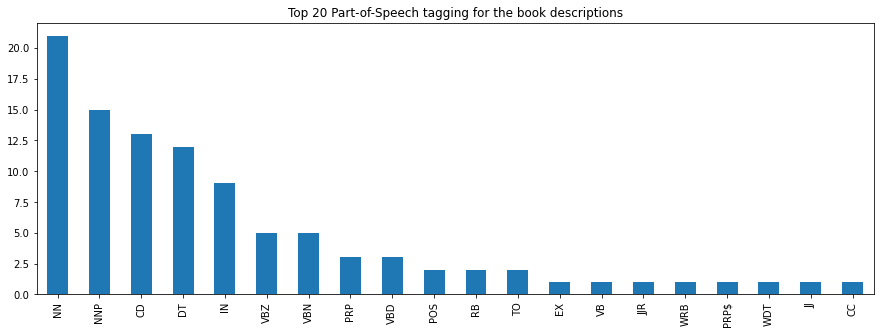

In [ ]:
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', figsize=(15,5), title="Top 20 Part-of-Speech tagging for the book descriptions" )

### Bigram distribution for the book description¶

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#Converting text descriptions into vectors using TF-IDF using Bigram
tfidf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tfidf.fit_transform(df['Description'])
total_words = tfidf_matrix.sum(axis=0)

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)

#Taking first 20 records
bigram = bigram.head(20)
bigram

,bigram,count
0,year old,15.300285
1,New York,14.651494
2,York Times,8.745844
3,cover edition,7.516392
4,bestselling author,6.471661
5,World War,5.939310
6,best friend,5.914390
7,years ago,5.738231
8,young woman,5.396650
9,tells story,5.293565


<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

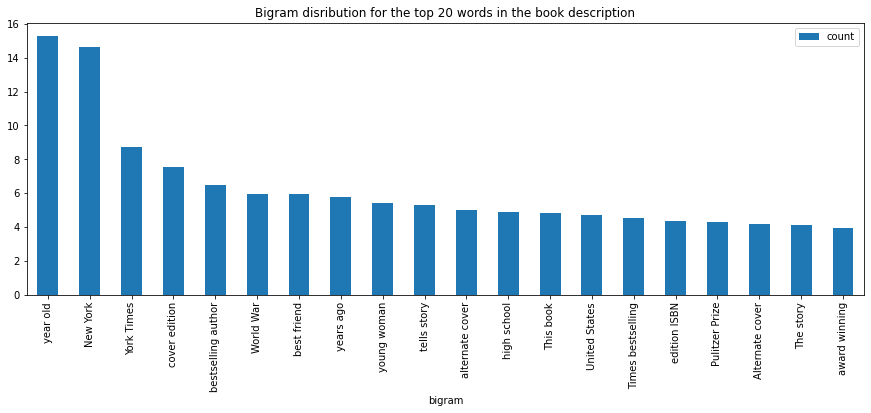

In [ ]:
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,5))

### Trigram distribution for the book description

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tfidf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tfidf.fit_transform(df['Description'])
total_words = tfidf_matrix.sum(axis=0)

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True)

#Taking first 20 records
trigram = trigram.head(20)
trigram

,trigram,count
0,New York Times,8.622413
1,York Times bestselling,4.504851
2,alternate cover edition,4.326905
3,World War II,3.759510
4,cover edition ISBN,3.742136
5,New York City,3.546020
6,Times bestselling author,3.415846
7,Alternate cover edition,3.293770
8,An alternate cover,2.924077
9,Pulitzer Prize winning,2.438539


<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

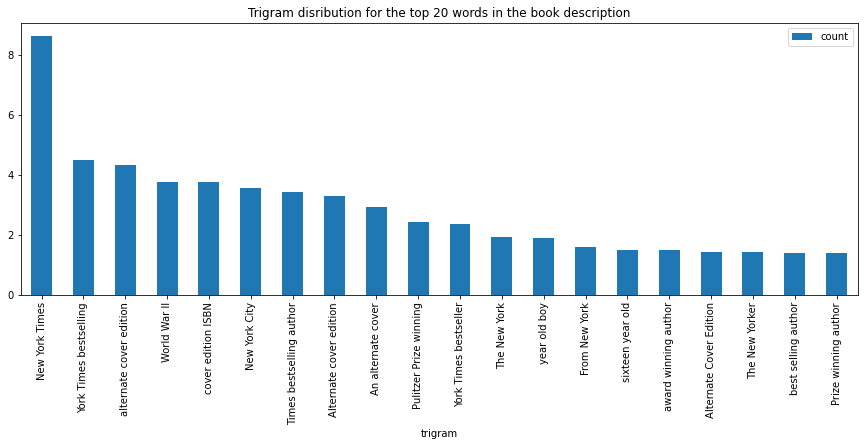

In [ ]:
#Plotting the trigram distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,5))

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

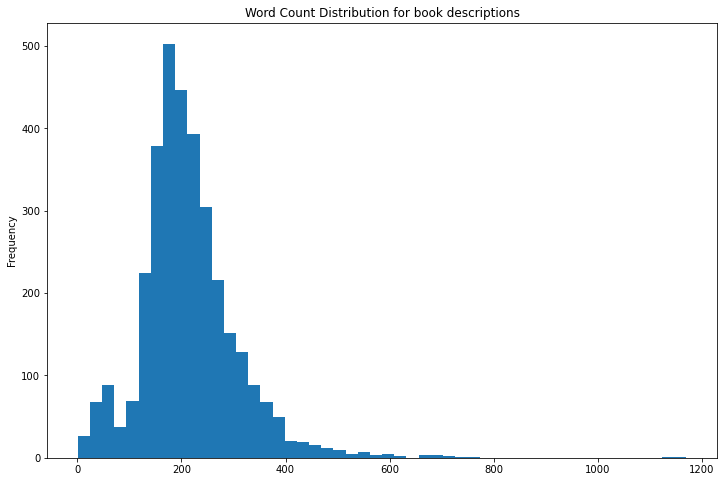

In [ ]:
#Calculating the word count for book description

books['Word_count'] = books['Description'].apply(lambda x: len(str(x).split()))# Plotting the word count
books['Word_count'].plot(kind='hist',bins = 50,figsize = (12,8),title='Word Count Distribution for book descriptions')

In [ ]:
import plotly.express as px

fig = px.pie(books, values=books['Genre'].value_counts().values, names=books['Genre'].value_counts().index)
fig.update_traces(hoverinfo='label+percent', textinfo='value')

In [ ]:
#filtering books with genres consiting more than 100 books
df = books_data[books['Genre'].map(books['Genre'].value_counts()) > 100]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 3351
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        2295 non-null   object 
 1   Author       2295 non-null   object 
 2   Avg-Rating   2295 non-null   float64
 3   Genre        2295 non-null   object 
 4   Description  2295 non-null   object 
 5   Word_count   2295 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 125.5+ KB


<Figure size 864x720 with 0 Axes>

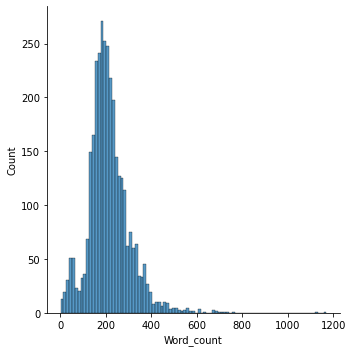

In [ ]:
import seaborn as sns
plt.figure(figsize=[12,10])
sns.displot(books_data['Word_count'])

### Data Preprocessing

In [ ]:
# creating a sub dataframe of fiction books with  less than 160 word count.
df1 = df[(df.Genre == 'Fiction') & (df.Word_count <= 160)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 38 to 3350
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   205 non-null    int64  
 1   Title        205 non-null    object 
 2   Author       205 non-null    object 
 3   Avg-Rating   205 non-null    float64
 4   Genre        205 non-null    object 
 5   Description  205 non-null    object 
 6   Word_count   205 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 12.8+ KB


In [ ]:
books_data.head()

,Title,Author,Avg-Rating,Genre,Description,Word_count
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195


In [ ]:
# dropping the  rows created in df2 from the df1 column.
df.drop(df1.index,axis=0,inplace=True)

C:\Users\himan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.pie(df, values=df['Genre'].value_counts().values, names=df['Genre'].value_counts().index)
fig.update_traces(hoverinfo='label+percent', textinfo='value')

In [ ]:
df.head()

,Title,Author,Avg-Rating,Genre,Description,Word_count
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195


### Data Balancing

In [ ]:
X = df[['Title','Author','Avg-Rating','Description']]
X

,Title,Author,Avg-Rating,Description
0,To Kill a Mockingbird,Harper Lee,4.27,The unforgettable novel of a childhood in a sl...
1,Pride and Prejudice,Jane Austen,4.27,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Librarian's note: There is an Alternate Cover ...
4,The Little Prince,Antoine de Saint-Exupéry,4.31,A pilot stranded in the desert awakes one morn...
...,...,...,...,...
3344,The Cay,Theodore Taylor,3.78,Phillip is excited when the Germans invade the...
3345,Laskar Pelangi,Andrea Hirata,4.22,Begitu banyak hal menakjubkan yang terjadi dal...
3346,The Moon and Sixpence,W. Somerset Maugham,4.13,"Based on the life of Paul Gauguin, The Moon an..."
3348,The Cruel Prince,Holly Black,4.09,This is a previously published cover edition o...


In [ ]:
y = pd.DataFrame(df['Genre'])
y

,Genre
0,Classics
1,Classics
2,Nonfiction
3,Classics
4,Classics
...,...
3344,Fiction
3345,Fiction
3346,Fiction
3348,Fantasy


In [ ]:
from imblearn.over_sampling import SMOTEN
oversample = SMOTEN(sampling_strategy='minority')
X1,y1=oversample.fit_resample(X,y)

In [ ]:
X1.shape


(2563, 4)

In [ ]:
y1.shape

(2563, 1)

In [ ]:
### Splitting data into train Test Split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#spliting the data into training 77% and test 33%
X_train,X_test,y_train,y_test= train_test_split(X1,y1,test_size=0.3,random_state=42)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (1794, 4)
Shape of testing data: (769, 4)


In [ ]:
## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=2000)

In [ ]:
x= tfidf.fit_transform(X_train).toarray()
x

array([[0.        , 0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.70710678, 0.        , 0.70710678, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ]])

In [ ]:
## Data encoding for the lable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)

C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



['Classics',
 'Fantasy',
 'Fiction',
 'Historical',
 'Mystery',
 'Nonfiction',
 'Young Adult']

In [ ]:
y = le.transform(y)

C:\Users\himan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y

array([0, 0, 5, ..., 2, 1, 1])